https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://www.statsmodels.org/stable/install.html

In [1]:
import pickle
import pandas
print('pandas',pandas.__version__)
import numpy
print('numpy',numpy.__version__)
import glob
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
import time
from sklearn import metrics
import statsmodels 
print('statsmodels',statsmodels.__version__)
# https://github.com/statsmodels/statsmodels/issues/4277
from statsmodels.tsa.arima_model import ARIMA

pandas 0.23.4
numpy 1.13.3
statsmodels 0.9.0


In [2]:
with open("single_process_df_other_notebook_1552842319.840491.pkl",'rb') as fil:
    list_of_kernel_dicts_for_other_notebooks = pickle.load(fil)

In [3]:
type(list_of_kernel_dicts_for_other_notebooks)

pandas.core.frame.DataFrame

In [4]:
list_of_kernel_dicts_for_other_notebooks.head()

,CPU 1 times guest,CPU 1 times guest_nice,CPU 1 times idle,CPU 1 times iowait,CPU 1 times irq,CPU 1 times nice,CPU 1 times softirq,CPU 1 times steal,CPU 1 times system,CPU 1 times user,...,system virtual memory buffers,system virtual memory cached,system virtual memory free,system virtual memory inactive,system virtual memory percent,system virtual memory shared,system virtual memory slab,system virtual memory total,system virtual memory used,time in unix seconds
0,0.0,0.0,60.2,0.0,0.0,0.0,2.2,0.0,24.5,13.2,...,91332608,638832640,792592384,405602304,35.2,524288,81928192,2096164864,573407232,1.552842e+09
1,0.0,0.0,87.9,0.0,0.0,0.0,0.0,0.0,6.8,5.3,...,91332608,638828544,792076288,405602304,35.2,524288,81952768,2096164864,573927424,1.552842e+09
2,0.0,0.0,98.1,0.0,0.0,0.0,0.0,0.0,1.9,0.0,...,91332608,638828544,791949312,405602304,35.2,524288,81952768,2096164864,574054400,1.552842e+09
3,0.0,0.0,92.5,0.0,0.0,0.0,0.0,0.0,3.8,3.8,...,91332608,638849024,791949312,405602304,35.2,524288,81973248,2096164864,574033920,1.552842e+09
4,0.0,0.0,95.2,0.0,0.0,0.0,0.0,0.0,1.0,3.8,...,91332608,638849024,791949312,405602304,35.2,524288,81973248,2096164864,574033920,1.552842e+09


In [ ]:
# picture of all the data

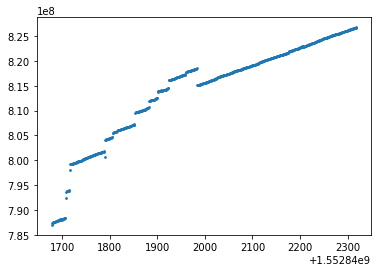

In [ ]:
ser = list_of_kernel_dicts_for_other_notebooks['system virtual memory active']
plt.scatter(list_of_kernel_dicts_for_other_notebooks['time in unix seconds'],ser,s=3);

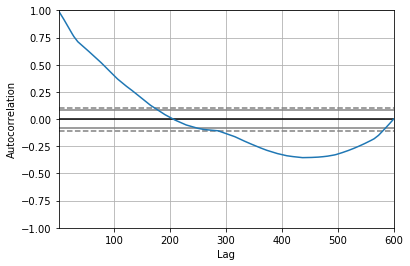

In [ ]:
pandas.plotting.autocorrelation_plot(ser);

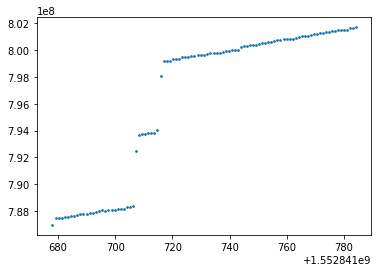

In [ ]:
ser_training = list_of_kernel_dicts_for_other_notebooks['system virtual memory active'][0:100]
plt.scatter(list_of_kernel_dicts_for_other_notebooks['time in unix seconds'][0:100],ser_training,s=3);

Correlation lag of 80?

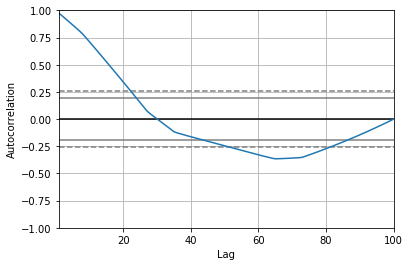

In [ ]:
pandas.plotting.autocorrelation_plot(ser_training);

                                   ARIMA Model Results                                    
Dep. Variable:     D.system virtual memory active   No. Observations:                   99
Model:                             ARIMA(5, 1, 0)   Log Likelihood               -1450.694
Method:                                   css-mle   S.D. of innovations         559083.637
Date:                            Tue, 19 Mar 2019   AIC                           2915.388
Time:                                    02:35:19   BIC                           2933.554
Sample:                                         1   HQIC                          2922.738
                                                                                          
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 1.488e+05   6.53e+04    

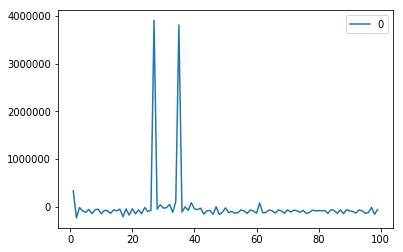

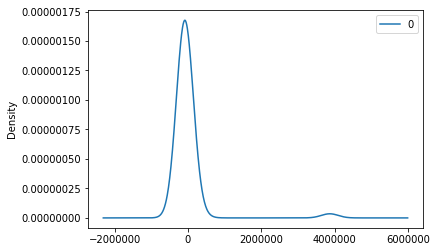

                  0
count  9.900000e+01
mean   3.277360e+02
std    5.620119e+05
min   -2.332865e+05
25%   -1.228364e+05
50%   -8.257449e+04
75%   -5.793623e+04
max    3.912152e+06


In [ ]:
model = ARIMA(ser_training, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pandas.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

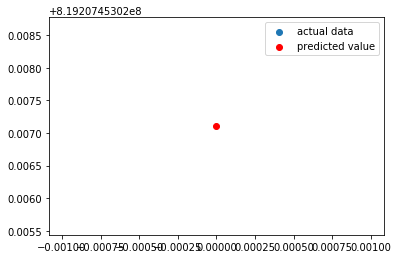

predicted=819207453.027107, expected=819187712.000000


Enter your name:  


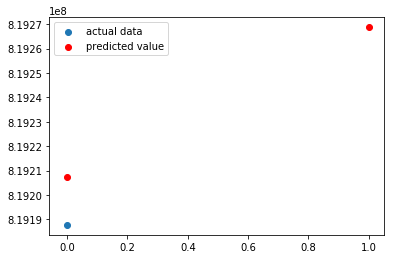

predicted=819268775.341218, expected=819187712.000000


Enter your name:  


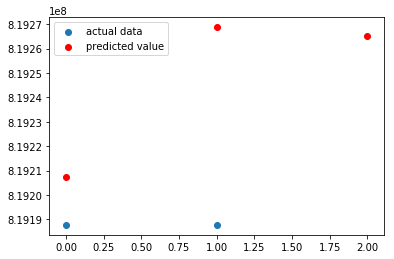

predicted=819265277.318324, expected=819187712.000000


Enter your name:  


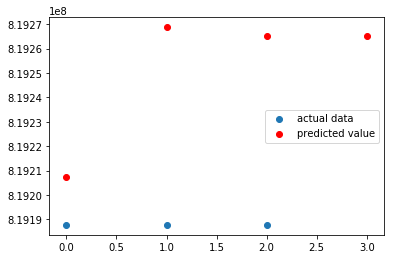

predicted=819265336.949672, expected=819245056.000000


Enter your name:  


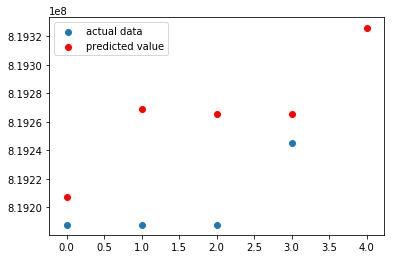

predicted=819325532.635213, expected=819302400.000000


Enter your name:  


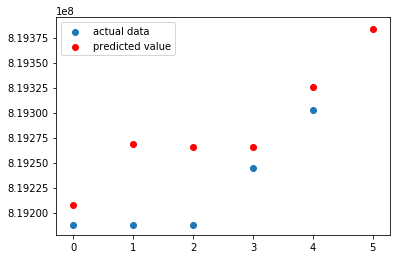

predicted=819383590.633717, expected=819359744.000000


Enter your name:  


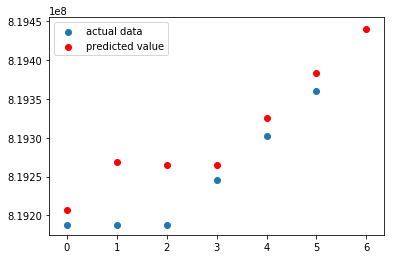

predicted=819439968.651449, expected=819388416.000000


Enter your name:  


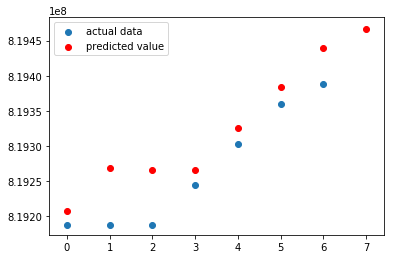

predicted=819465958.635168, expected=819388416.000000


Enter your name:  


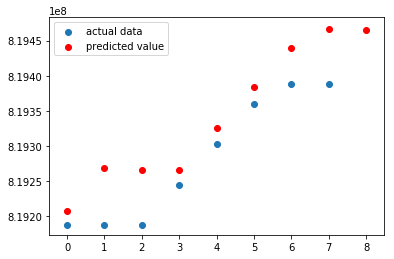

predicted=819464684.496221, expected=819445760.000000


Enter your name:  


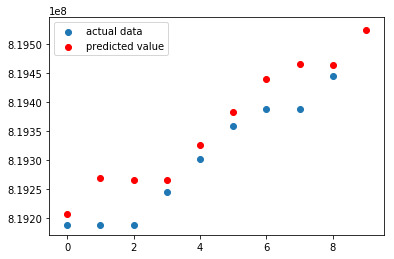

predicted=819525940.686001, expected=819503104.000000


Enter your name:  


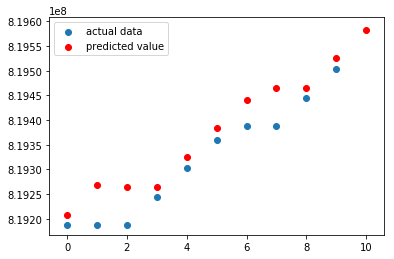

predicted=819583391.832319, expected=819560448.000000


Enter your name:  


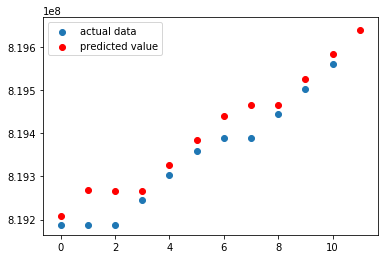

predicted=819640391.087836, expected=819617792.000000


Enter your name:  


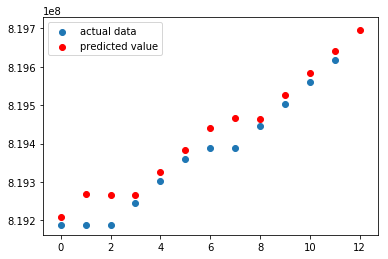

predicted=819696659.354675, expected=819675136.000000


Enter your name:  


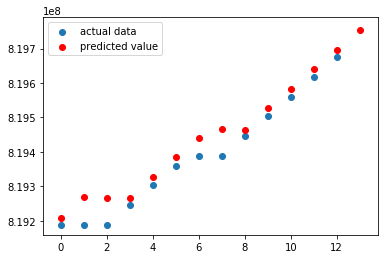

predicted=819754401.633888, expected=819744768.000000


Enter your name:  


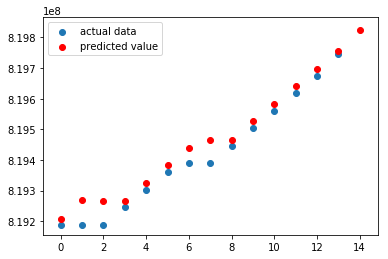

predicted=819824760.795706, expected=819834880.000000


Enter your name:  


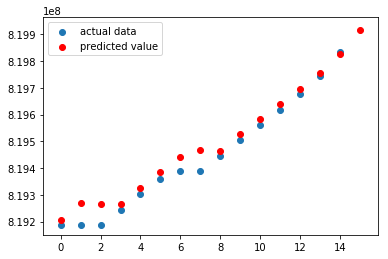

predicted=819916051.341648, expected=819834880.000000


Enter your name:  


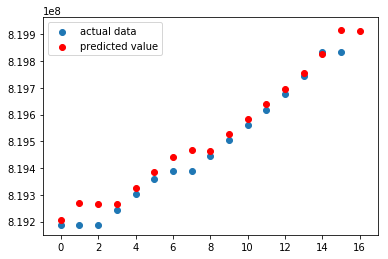

predicted=819910085.478504, expected=819863552.000000


Enter your name:  


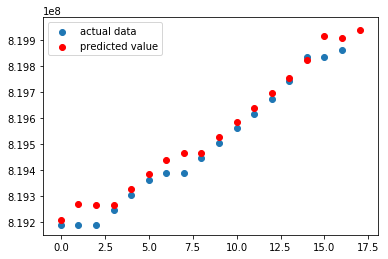

predicted=819940780.935191, expected=819863552.000000


Enter your name:  


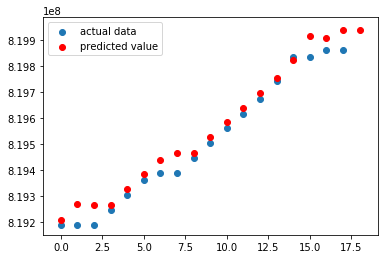

predicted=819939133.294493, expected=819920896.000000


Enter your name:  


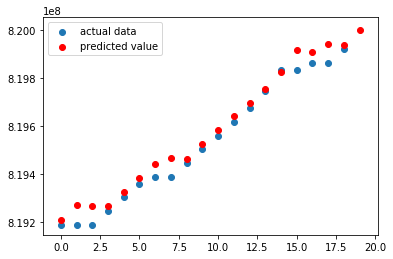

predicted=820001342.268722, expected=819978240.000000


Enter your name:  


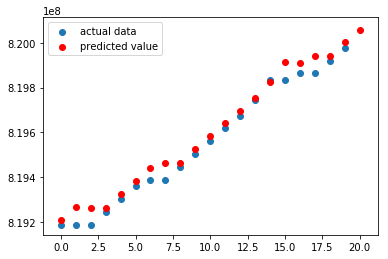

predicted=820057289.521910, expected=819978240.000000


Enter your name:  


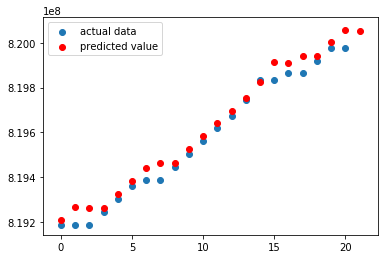

predicted=820053745.680357, expected=820105216.000000


Enter your name:  


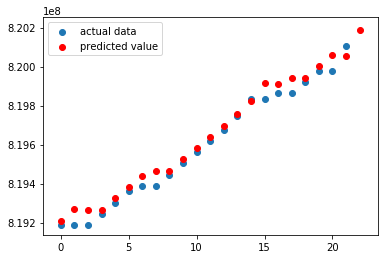

predicted=820188059.751465, expected=820105216.000000


Enter your name:  


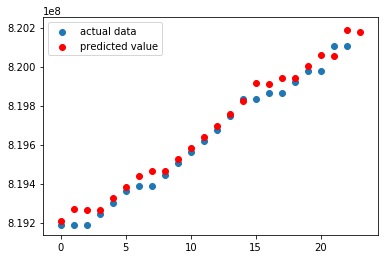

predicted=820180007.193465, expected=820150272.000000


Enter your name:  


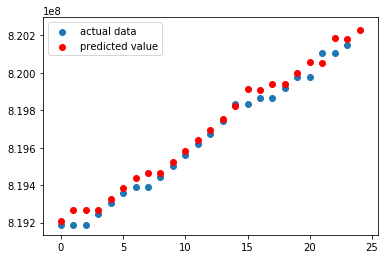

predicted=820228529.939582, expected=820207616.000000


Enter your name:  


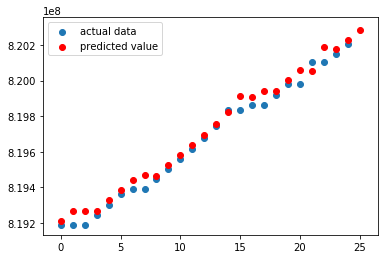

predicted=820285005.989423, expected=820207616.000000


Enter your name:  


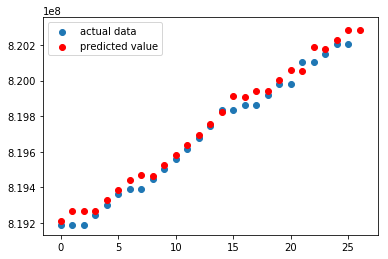

predicted=820283641.310363, expected=820273152.000000


Enter your name:  


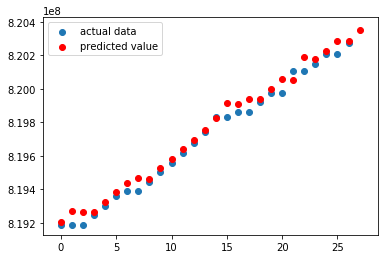

predicted=820351849.503904, expected=820273152.000000


Enter your name:  


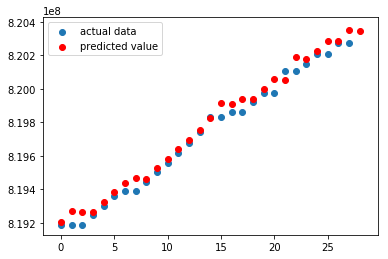

predicted=820347780.515541, expected=820273152.000000


Enter your name:  


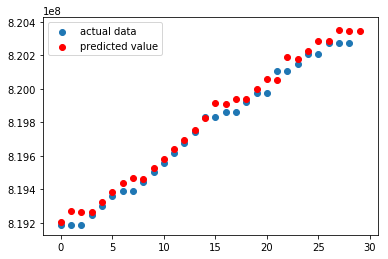

predicted=820348480.621259, expected=820330496.000000


In [ ]:
X = ser.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)] # split data: 66% for training, 34% for testing
history = [x for x in train] # convert numpy array to list
predictions = list()
for t in range(len(test)): # iterate forward in time
    model = ARIMA(history, order=(5,1,0)) # https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_model.ARIMA.html
    # {p,d,q} = AR order, the degree of differencing, and the MA order.  # https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima

    # https://people.duke.edu/~rnau/411arim.htm#pdq
    # p is the number of autoregressive terms,
    # d is the number of nonseasonal differences needed for stationarity, and
    # q is the number of lagged forecast errors in the prediction equation.

    model_fit = model.fit(disp=0)
    output = model_fit.forecast() # https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html
    # forecast (array) – Array of out of sample forecasts
    # stderr (array) – Array of the standard error of the forecasts.
    # conf_int (array) – 2d array of the confidence interval for the forecast
    
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

    plt.clf()
    plt.cla()
    plt.close()
    plt.scatter(range(len(test[0:t])),  test[0:t],label='actual data')
    plt.scatter(range(len(predictions)),predictions, color='red',label='predicted value')
    plt.legend()
    plt.show()
    print('predicted=%f, expected=%f' % (yhat, obs))
    person = input('Enter your name: ')

error = metrics.mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.scatter(range(len(test)),test)
plt.scatter(range(len(predictions)),predictions, color='red')
plt.show()